In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
data = pd.read_csv("empdata.csv")

# Drop rows with missing values
data.dropna(inplace=True)

# Convert Gender and Company Type to one-hot encoded variables
data = pd.get_dummies(data, columns=['Gender', 'Company Type'])

# Replace Yes/No with 1/0 for WFH Setup Available
data['WFH Setup Available'] = data['WFH Setup Available'].replace({'Yes': 1, 'No': 0})

# Fill missing values in 'Resource Allocation' with median
data['Resource Allocation'].fillna(data['Resource Allocation'].median(), inplace=True)

# Split data into features and target variable
X = data.drop(['Employee ID', 'Burn Rate','Date of Joining'], axis=1)
y = data['Burn Rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.003368592548960564
R^2 Score: 0.9122871687405746


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
data = pd.read_csv("empdata.csv")
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [18]:
data.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.878459,0.690983,0.737556
Resource Allocation,0.878459,1.000000,0.799662,0.856278
Mental Fatigue Score,0.690983,0.799662,1.000000,0.944546
Burn Rate,0.737556,0.856278,0.944546,1.000000


In [19]:
data = pd.get_dummies(data, columns=['Gender', 'Company Type', 'WFH Setup Available'], prefix=['Gender', 'Company', 'WFH'])

In [20]:
data.dropna(inplace=True)

In [21]:
X = data.drop(['Employee ID', 'Burn Rate','Date of Joining'], axis=1)
y = data['Burn Rate']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [23]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
y_pred = rf_model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.0033164644169136484
R^2 Score: 0.9142422705803112


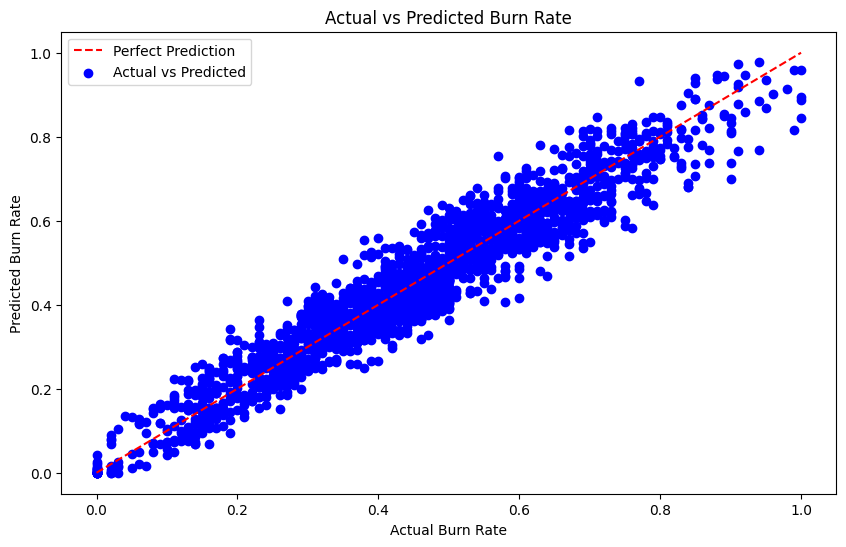

In [29]:
import matplotlib.pyplot as plt

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Burn Rate')
plt.ylabel('Predicted Burn Rate')
plt.title('Actual vs Predicted Burn Rate')
plt.legend()
plt.show()

